# Part I - Ford GoBike System Data
## by Kayode Dada

## Problem Statement ##
This project aims to investigate user demographics and usage patterns within a bike-sharing program. Through exploratory analysis, we will identify core trends in the dataset, while explanatory visualizations will communicate key findings. The key research questions are as listed below:

### Research Questions ###
1. What demographic factors are most associated with trip duration?
2. How do usage patterns differ between subscribers and occasional customers?

### [DELETE] ###
4. Which stations are most frequently used, and how does this vary by user demographics?
5. How do usage patterns vary by time of day and day of the week, and do these trends differ by user type?

### The Dataset ###
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
The dataset contains 183,412 entries with 16 columns. Each ride is represented by a single row in the dataset. The dataset contains information on bike-share trips and details of each trip's duration, start and end times, and station locations (start and end stations). It also includes user demographics, such as birth year, gender, and user type.

## Preliminary Wrangling


In [349]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

> [DELETE] Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [247]:
ford_gobike_data = pd.read_csv('./data/201902-fordgobike-tripdata.csv')

In [109]:
## high-level overview assessment of the dataset
print(ford_gobike_data.shape)
ford_gobike_data.info()
ford_gobike_data.head(5)

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [93]:
## [DELTE] assessment of what specific feature represents and their values
print(ford_gobike_data['user_type'].unique())
print(ford_gobike_data['bike_share_for_all_trip'].unique())
print(ford_gobike_data['member_gender'].unique())

['Customer' 'Subscriber']
['No' 'Yes']
['Male' nan 'Other' 'Female']


In [414]:
##### [DELETE] TODO  
##### Remove nan rows or replace nan rows with member gender 'Other'
print('Columns with Missing data counts')
print(f'Gender count: {ford_gobike_data['member_gender'].isna().sum()}')
print(f'Birth Year: {ford_gobike_data['member_birth_year'].isna().sum()}')
print(f'Max Age: {(2024-ford_gobike_data['member_birth_year'].min())}')
# Calculate the median trip duration in minutes
print(f"Median Trip Duration: {ford_gobike_data['duration_sec'].max() / 60} minutes")

Columns with Missing data counts
Gender count: 8265
Birth Year: 8265
Max Age: 146.0
Median Trip Duration: 1424.0666666666666 minutes


### What is the structure of your dataset?

Below is an overview of the structure of the dataset:

- **bike_id**: Unique identifier for the bike used (integer)
- **duration_sec**: Duration of the trip in seconds (integer)
- **start_time**: Timestamps for when the trip started (string)
- **end_time**: Timestamps for when the trip ended (string)
- **start_station_id**: ID of the start station (float)
- **start_station_name**: Names of the start station (string)
- **start_station_latitude**: Geographic coordinates for the start station - Lat (float)
- **start_station_longitude**: Geographic coordinates for the start station - Long (float)
- **end_station_id**: IDs of the end stations (float)
- **end_station_name**: Names of the end station (string)
- **end_station_latitude**: Geographic coordinates for the end station - Lat(float)
- **end_station_longitude**: Geographic coordinates for the end station - Long (float)
- **user_type**: Type of user (string)
- **member_birth_year**: Birth year of the user (float).
- **member_gender**: Gender of the user (string).
- **bike_share_for_all_trip**: Indicates if the bike is part of an all-trip share program (string).

### What is/are the main feature(s) of interest in your dataset?

1. **What demographic factors are most associated with trip duration?**  
   - This question will explore how variables like age and gender may influence the length of bike-share trips.

2. **How do usage patterns differ between subscribers and occasional customers?**  
   - Analyzing trip frequency, average duration, and times of use between these groups may reveal distinct behaviors and needs.

## [DELETE] ##
3. **Which stations are most frequently used, and how does this vary by user demographics?**  
   - Understanding station popularity among different demographic segments

4. **How do usage patterns vary by time of day and day of the week, and do these trends differ by user type?**  
   - Identifying peak times for various user demographics

### [UPDATE] What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The following features in the dataset will help support investigating the features of the interest in this dataset:
- **bike_id**: Key for understanding distance/hours travelled by bike
- **duration_sec**: Key for understanding trip lengths, usage patterns and peak activity periods.
- **start_time**, **end_time**: Useful for analyzing peak travel times and user behavior throughout the day/week
- **start_station_id**, **start_station_latitude**, **start_station_longitude**, **end_station_id**, **end_station_latitude**, **end_station_longitude**: Important for assessing the most popular stations and geographic patterns in trip origins and destinations 
- **user_type**: Allows differentiation between casual users and subscribers
- **member_birth_year**, **member_gender** : Provides demographic insights 
 

## Univariate Exploration
In this section, I investigate the distributions of individual variables, taking a deeper look at unusual points or outliers, to clean things up and prepare to look at the relationships between variables. 

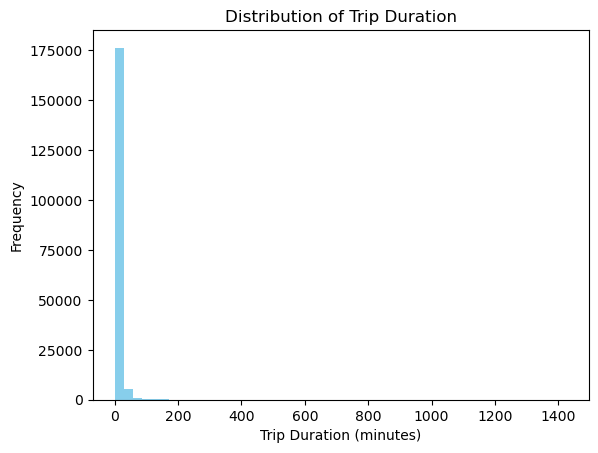

In [430]:
# Histogram of trip duration
ford_gobike_data['duration_minute'] = ford_gobike_data['duration_sec']/60  # Converting seconds to minutes

plt.hist(ford_gobike_data['duration_minute'], bins=50, color='skyblue')  
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration');

**Observation**
The distribution of trip duration, visualized through a histogram, is right-skewed, with a high frequency of short trips with a tapering number of longer trips. This pattern suggests that most bike-share users take shorter trips. Converting the trip duration to minutes and using a log of the data my revealed better information about the distribution pattern.

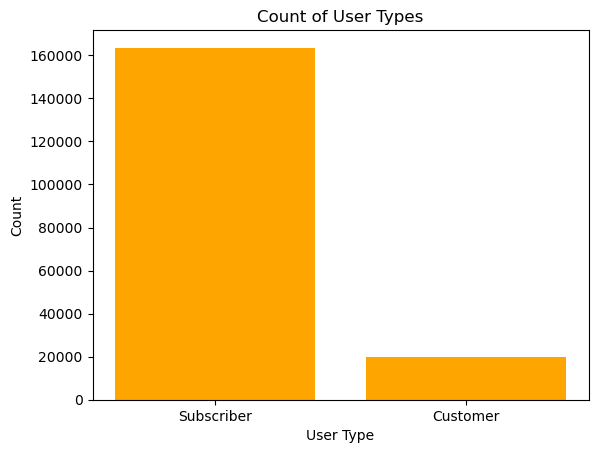

In [217]:
## Bar Chart for User Types
user_type_counts = ford_gobike_data['user_type'].value_counts()
plt.bar(user_type_counts.index, user_type_counts.values, color='orange')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Count of User Types');

**Observation** 
The distribution of user_type shows a majority of the entries falling under the subscriber category. This suggests that the bike-share system has a strong core user base who use the service regularly. Casual users make up a smaller portion of the dataset. Therefore, Subscriber usage patterns may dominate insights, masking the distinct behaviors of casual users if not looked at separately.

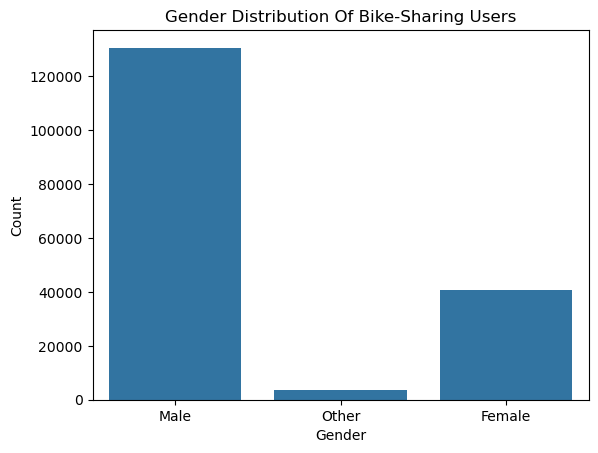

In [366]:
sns.countplot(data=ford_gobike_data, x='member_gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution Of Bike-Sharing Users');

**Observation**
The gender distribution is also uneven, with a majority of users identifying as Male, followed by Female users. The Other category, which includes unknown or non-disclosed gender entries, is the smallest group. This pattern suggests that the service may be more popular among male users or that there are certain factors attracting more male riders to the bike-share system. The significant difference between male and female users may reflect demographic preferences or social factors. The small number of users in the "Other" category may indicate incomplete data entry or a lack of options for non-binary or undisclosed users

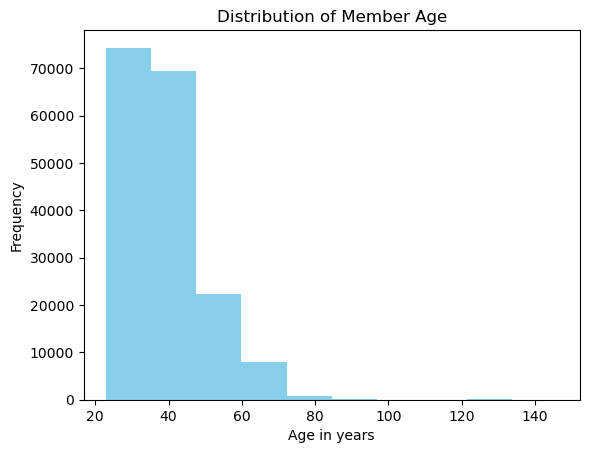

In [420]:
# Compute member age
current_year = datetime.now().year
ford_gobike_data['member_age'] = (current_year - ford_gobike_data['member_birth_year'])

# Histogram of Age distribution
plt.hist(ford_gobike_data['member_age'], color='skyblue')
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title('Distribution of Member Age');

### Discussion of the distribution(s) of variables of interest 

1. **Trip Duration (Histogram)**:
   - The distribution of trip durations is heavily skewed, with most trips being relatively short.
   - To better visualize this, I will apply a log scale on the y-axis.
   - The long tail of unusually lengthy trips could be outliers or errors in data recording.
   - A transformation was done to convert trip duration from seconds to minutes to improve interpretability

2. **User Type (Bar Chart)**:
   - The bar chart shows a higher count of subscribers compared to casual customers. This suggests that the bike-share program is primarily used by regular users, likely for commuting.
   - The distribution is straightforward with no unusual values.

3. **Gender Distribution (Count Plot)**:
   - Among users who provided gender information, males appear to be the majority, followed by females, with a smaller "Other" category.
   - A significant number of missing values in the `member_gender` column could bias the distribution, which might need handling if gender

## Bivariate Exploration

In this section I will investigate the relationships between pairs of variables in the dataset.

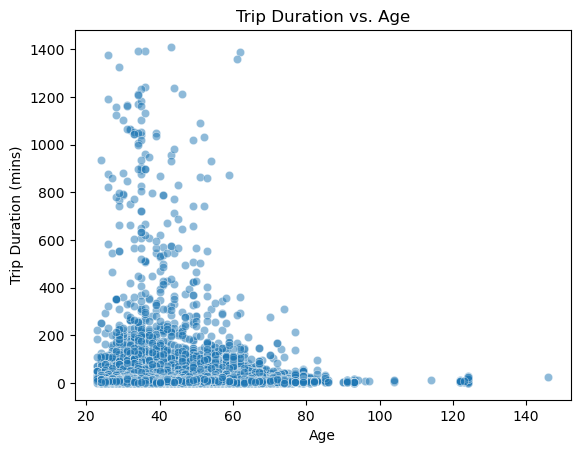

In [433]:
## Scatter plot of Trip Duration and Birth Year
sns.scatterplot(data=ford_gobike_data, x=ford_gobike_data['member_age'], y=ford_gobike_data['duration_minute'], alpha=0.5)
plt.title('Trip Duration vs. Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (mins)')
plt.show()

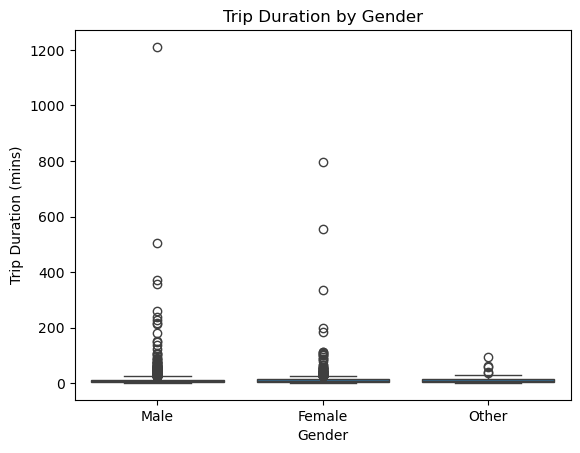

In [435]:
#Relationship between Trip Duration and Gender - Box Plot
sample_size = 6000
ford_gobike_sample = ford_gobike_data.sample(n=sample_size, random_state=8) 

sns.boxplot(data=ford_gobike_sample[ford_gobike_sample['member_gender'].notna()], x='member_gender', y=ford_gobike_sample['duration_minute'])
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (mins)')
plt.show()

### Discussion of the relationships observed in the Bivariant Exploration
Based on the bivariate exploration of *trip duration* in relation to *birth year (age)* and *gender*, the following relationships and variations were observed:

1. **Trip Duration and Birth Year (Age)**
There is a weak positive correlation, where trip duration tends to become more variable and potentially longer as age increases, particularly for users aged 20-60. Most trips across all ages cluster within 0-200 minutes, but middle-aged users (30-60 years) show the greatest variability, taking both very short and very long trips. Younger users (20-30 years) generally take shorter, consistent trips, while older users (60+ years) exhibit a gradual decline in both trip duration and variability. Although age slightly influences trip duration, it’s not a strong determinant, as short trips are prevalent across all ages. There also appears to be a quality issues with the dataset, large number of outliers in the trip duration (trips 120x greater than the median of less than 10 minutes) and age with members over 90 years old

2. **Trip Duration and Gender**
The box plot of trip duration by gender reveals that all three categories (Male, Female, and Other) have similarly skewed distributions, with the majority of trips concentrated in shorter durations and numerous outliers in higher ranges. The median trip duration is similar across genders, clustered below 10 minutes. Male users show the most extreme outliers, with some trips reaching around 1200 minutes, while Female users have outliers up to about 800 minutes. The "Other" category has fewer and less extreme outliers, indicating lower variability. Overall, despite differences in outliers and sample size, the main pattern of shorter trip durations is consistent across all gender categories.

## Multivariate Exploration
Next we take a 

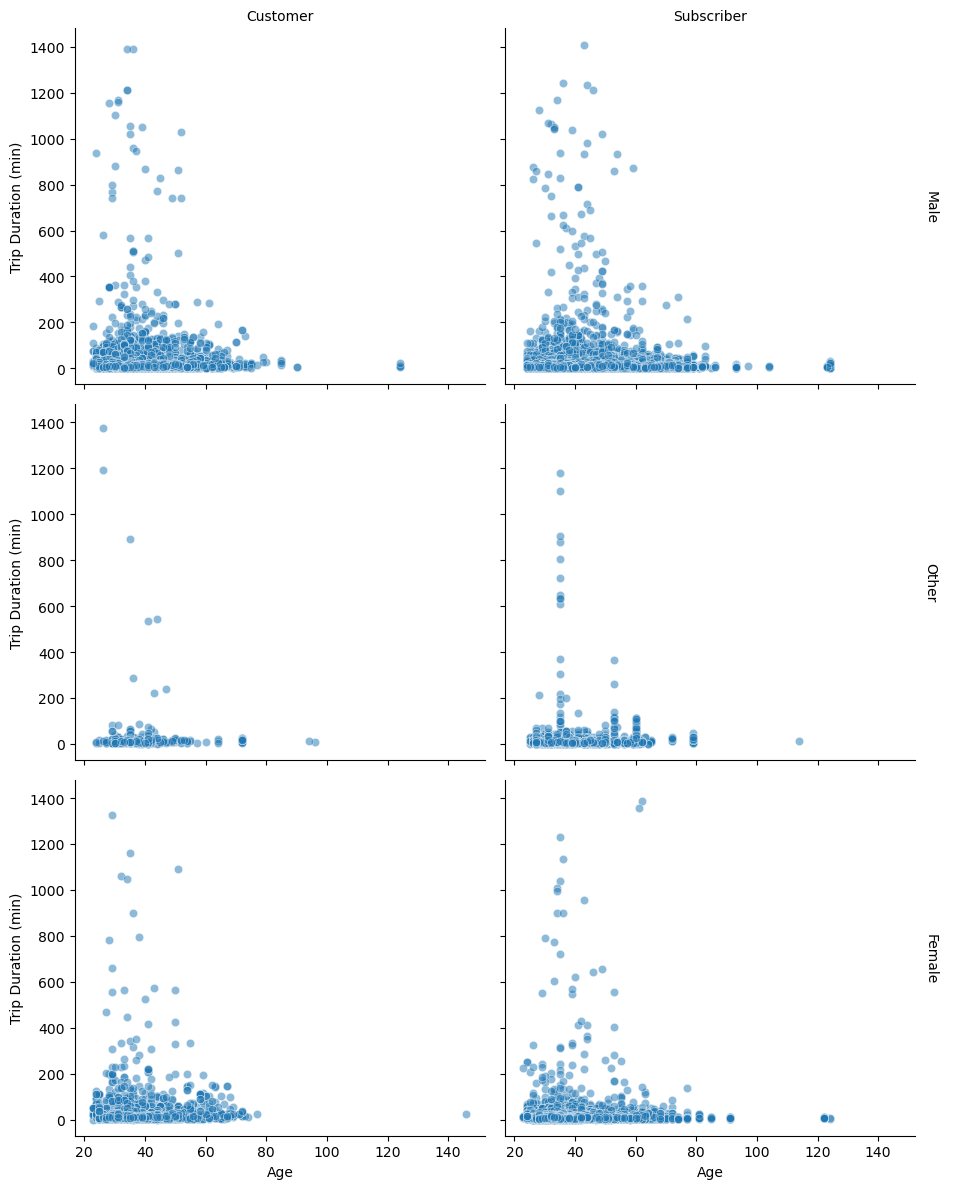

In [447]:
# Creating a FacetGrid to analyze trip duration by user type, gender and age
g = sns.FacetGrid(ford_gobike_data[ford_gobike_data['member_gender'].notna()], col='user_type', row='member_gender', 
                  margin_titles=True, height=4, aspect=1.2)
g.map(sns.scatterplot, 'member_age', 'duration_minute', alpha=0.5)
g.set_axis_labels('Age', 'Trip Duration (min)')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.add_legend()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.




> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

